**Introduction to Convolutional Neural Network & Computer Vision**

**Get Data**

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-03-26 00:54:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.207, 108.177.127.207, 172.217.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  33.4MB/s    in 3.1s    

2024-03-26 00:54:28 (33.4 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



**Lets checkout our data**

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'


In [ ]:
# Another way to find out how many images are in a file

num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

**To visualize our images, first lets get the class names**

In [ ]:
# Get the classnames
import pathlib
import numpy as np

data_dir=pathlib.Path("pizza_steak/train")
data_dir

PosixPath('pizza_steak/train')

In [ ]:
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
# It creates a list of class_names from subdirectories

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory
  target_folder=target_dir + target_class
  print(target_folder)

  # Get a random image path following command will sample any one random image
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Plot
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image
  return img

pizza_steak/train/pizza
['2999507.jpg']
Image shape: (512, 306, 3)


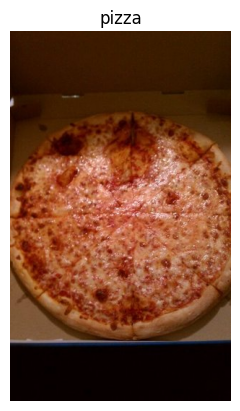

In [ ]:
# View a random image from the training dataset
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

array([[[52, 20,  0],
        [52, 20,  0],
        [53, 21,  0],
        ...,
        [53, 25,  1],
        [58, 28,  4],
        [58, 28,  4]],

       [[52, 20,  0],
        [52, 20,  0],
        [53, 21,  0],
        ...,
        [53, 25,  1],
        [57, 27,  3],
        [57, 27,  3]],

       [[52, 20,  0],
        [53, 21,  0],
        [53, 21,  0],
        ...,
        [53, 25,  1],
        [57, 29,  5],
        [57, 29,  5]],

       ...,

       [[ 8,  0,  0],
        [ 8,  0,  0],
        [ 8,  0,  0],
        ...,
        [ 9,  0,  1],
        [10,  0,  0],
        [10,  0,  0]],

       [[ 8,  0,  0],
        [ 8,  0,  0],
        [ 8,  0,  0],
        ...,
        [ 9,  0,  1],
        [10,  0,  0],
        [10,  0,  0]],

       [[ 8,  0,  0],
        [ 8,  0,  0],
        [ 8,  0,  0],
        ...,
        [ 9,  0,  1],
        [10,  0,  0],
        [10,  0,  0]]], dtype=uint8)
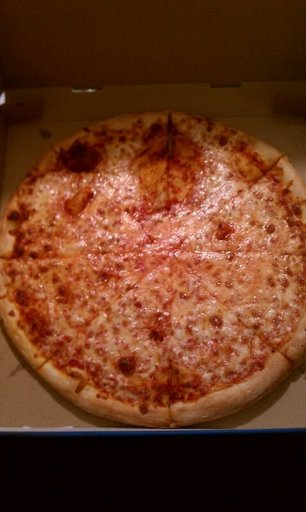

In [ ]:
img

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 306, 3), dtype=uint8, numpy=
array([[[52, 20,  0],
        [52, 20,  0],
        [53, 21,  0],
        ...,
        [53, 25,  1],
        [58, 28,  4],
        [58, 28,  4]],

       [[52, 20,  0],
        [52, 20,  0],
        [53, 21,  0],
        ...,
        [53, 25,  1],
        [57, 27,  3],
        [57, 27,  3]],

       [[52, 20,  0],
        [53, 21,  0],
        [53, 21,  0],
        ...,
        [53, 25,  1],
        [57, 29,  5],
        [57, 29,  5]],

       ...,

       [[ 8,  0,  0],
        [ 8,  0,  0],
        [ 8,  0,  0],
        ...,
        [ 9,  0,  1],
        [10,  0,  0],
        [10,  0,  0]],

       [[ 8,  0,  0],
        [ 8,  0,  0],
        [ 8,  0,  0],
        ...,
        [ 9,  0,  1],
        [10,  0,  0],
        [10,  0,  0]],

       [[ 8,  0,  0],
        [ 8,  0,  0],
        [ 8,  0,  0],
        ...,
        [ 9,  0,  1],
        [10,  0,  0],
        [10,  0,  0]]], dtype=uint8)>

In [ ]:
# View the image shape
img.shape #returns width,height, color channels

(512, 306, 3)

In [ ]:
# Get the img normalized
img/225.0

array([[[0.23111111, 0.08888889, 0.        ],
        [0.23111111, 0.08888889, 0.        ],
        [0.23555556, 0.09333333, 0.        ],
        ...,
        [0.23555556, 0.11111111, 0.00444444],
        [0.25777778, 0.12444444, 0.01777778],
        [0.25777778, 0.12444444, 0.01777778]],

       [[0.23111111, 0.08888889, 0.        ],
        [0.23111111, 0.08888889, 0.        ],
        [0.23555556, 0.09333333, 0.        ],
        ...,
        [0.23555556, 0.11111111, 0.00444444],
        [0.25333333, 0.12      , 0.01333333],
        [0.25333333, 0.12      , 0.01333333]],

       [[0.23111111, 0.08888889, 0.        ],
        [0.23555556, 0.09333333, 0.        ],
        [0.23555556, 0.09333333, 0.        ],
        ...,
        [0.23555556, 0.11111111, 0.00444444],
        [0.25333333, 0.12888889, 0.02222222],
        [0.25333333, 0.12888889, 0.02222222]],

       ...,

       [[0.03555556, 0.        , 0.        ],
        [0.03555556, 0.        , 0.        ],
        [0.03555556, 0

**An end to end example of CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess the data (get all of the pixel value between 0 & 1)
train_datagen=ImageDataGenerator(rescale=1./255) # Generates batches of image with real time data augumentation
valid_datagen=ImageDataGenerator(rescale=1./255)

# Set paths
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 0.5697 - accuracy: 0.7073 - val_loss: 0.3975 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 57s 1s/step - loss: 0.4346 - accuracy: 0.8060 - val_loss: 0.3690 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.4091 - accuracy: 0.8153 - val_loss: 0.3315 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 57s 1s/step - loss: 0.3580 - accuracy: 0.8360 - val_loss: 0.3157 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 59s 1s/step - loss: 0.3143 - accuracy: 0.8660 - val_loss: 0.3631 - val_accuracy: 0.8360


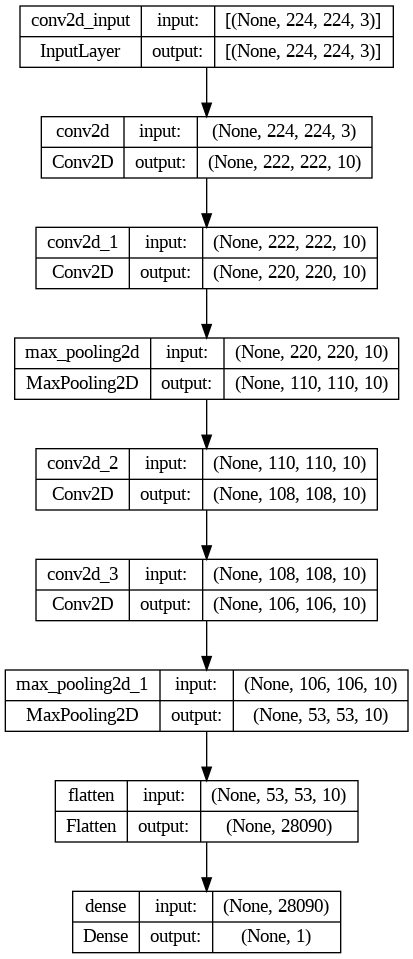

In [ ]:
from keras.utils import plot_model
plot_model(model_1,show_shapes=True)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2=model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 89ms/step - loss: 1.7207 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 86ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 93ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 93ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 92ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🤨**Note**

Our model_2 had about 20x more parameters than model_1 still accuracy less of model_2

In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="adam",
                metrics=["accuracy"])

model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 238ms/step - loss: 4.9341 - accuracy: 0.6060 - val_loss: 0.5691 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 11s 239ms/step - loss: 0.7589 - accuracy: 0.7007 - val_loss: 0.8152 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 11s 236ms/step - loss: 0.6403 - accuracy: 0.7247 - val_loss: 0.5993 - val_accuracy: 0.6840
Epoch 4/5
47/47 [==============================] - 11s 238ms/step - loss: 0.6788 - accuracy: 0.7120 - val_loss: 0.5060 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.5346 - accuracy: 0.7573 - val_loss: 0.4366 - val_accuracy: 0.8040


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

1. Become One with data

pizza_steak/train/steak
['2549316.jpg']
Image shape: (512, 512, 3)
pizza_steak/train/pizza
['857888.jpg']
Image shape: (512, 384, 3)


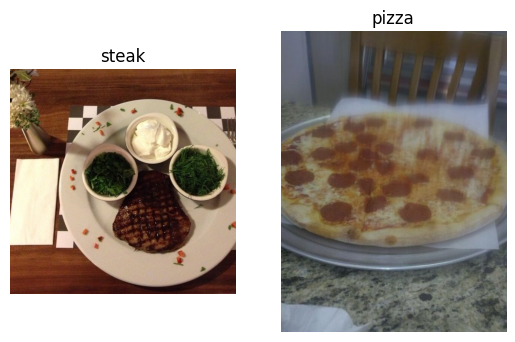

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

2. Preprocess the data

In [ ]:
# Define the directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [ ]:
# Create training and testing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
# Means when you load the data, load the pixels by dividing it by 255.

⚡The flow_from_directory() method takes a path of a directory and generates batches of augmented data. The directory structure is very important when you are using flow_from_directory() method.⚡

 ⚡Keras ImageDataGenerator is used to take the inputs of the original data and then transform it on a random basis, returning the output resultant containing solely the newly changed data. It does not include the data.⚡

⚠️"For more info refer 2nd example of tensorlow document"

In [ ]:
# Load in our image data from directories and turn them into batches

train_data=train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                             target_size=(224,224), # Target size (H,W)
                                             class_mode="binary", #Type of data
                                             batch_size=32) # size of minibatches to load data


test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images,labels=train_data.next()
len(images),len(labels)

(32, 32)

In [ ]:
len(train_data)  # No. of batches

47

In [ ]:
# Get the first 2 images
images[:2],images[0].shape,labels[0]

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

🕺🪩 3.Lets create a CNN Model

In [ ]:
# Import necessary things
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam

**Padding Types**

* Valid = Output shape gets compressed

* Same = Output shape is same as input shape

In [ ]:
model_4=Sequential([
    Conv2D(filters=10,
    kernel_size=3,
    strides=1,
    padding="valid",
    activation="relu",
    input_shape=(224,224,3)
    ),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_4=model_4.fit(train_data,epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 69s 1s/step - loss: 2.2127 - accuracy: 0.6640 - val_loss: 0.4599 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 70s 1s/step - loss: 0.4736 - accuracy: 0.7787 - val_loss: 0.4299 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 71s 1s/step - loss: 0.4286 - accuracy: 0.8160 - val_loss: 0.4019 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 67s 1s/step - loss: 0.3516 - accuracy: 0.8620 - val_loss: 0.4038 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 71s 2s/step - loss: 0.2628 - accuracy: 0.8973 - val_loss: 0.3828 - val_accuracy: 0.8460


🔍Imp resource:
https://paperswithcode.com/area/computer-vision

In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 6s 364ms/step - loss: 0.3631 - accuracy: 0.8360


[0.36314699053764343, 0.8360000252723694]

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 7s 430ms/step - loss: 0.3828 - accuracy: 0.8460


[0.3827971816062927, 0.8460000157356262]

**5. Evaluating our Model**

<Axes: >

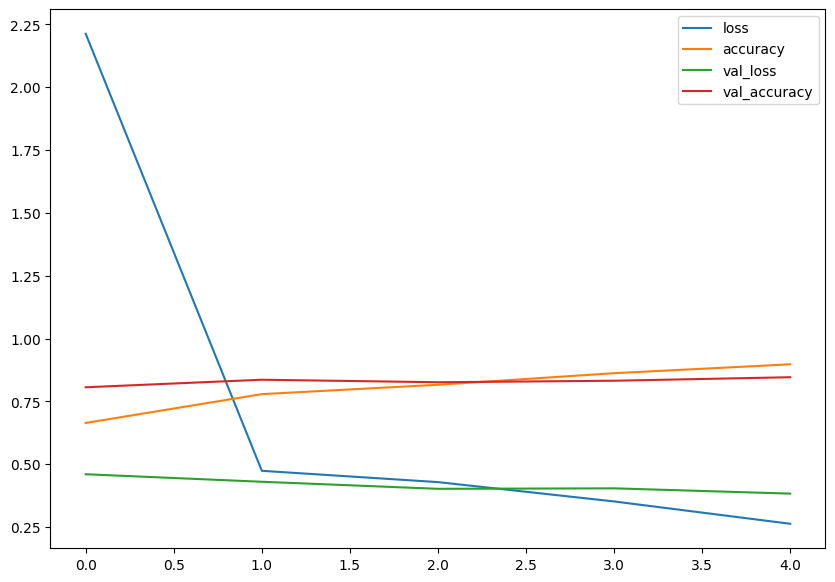

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation & training curves separately

def plot_loss_curves(history):

  """
  Returns separate loss curves for training and validation metrics.

  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot Loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot Accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="Training_acc")
  plt.plot(epochs,val_accuracy,label="Val_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

  plt.show()

🤔Everytime you want new figure don't forget to do plt.figure()

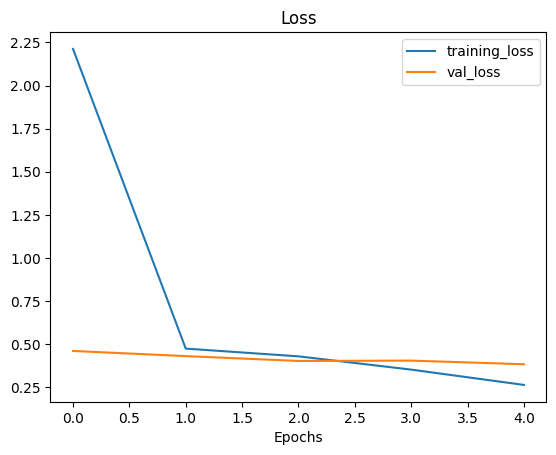

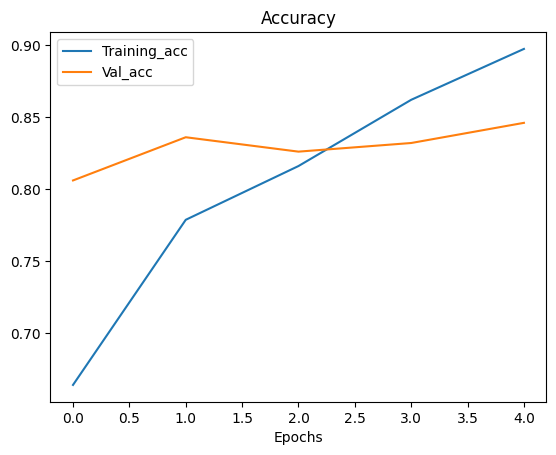

In [ ]:
# Check out curves
plot_loss_curves(history_4)

🤔**Note :** When a model's **Validation loss starts to increase**, its likely that the model is **Overfitting**the training dataset.

This means its learning the patterns too well on training dataset.

In [ ]:
# Creating a model with MaxPool2D to avoid overfitting

model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 29s 598ms/step - loss: 0.6699 - accuracy: 0.5760 - val_loss: 0.5737 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 28s 601ms/step - loss: 0.4831 - accuracy: 0.7887 - val_loss: 0.3659 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 30s 633ms/step - loss: 0.4216 - accuracy: 0.8173 - val_loss: 0.3823 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 30s 639ms/step - loss: 0.3918 - accuracy: 0.8340 - val_loss: 0.3589 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 29s 612ms/step - loss: 0.3631 - accuracy: 0.8447 - val_loss: 0.3209 - val_accuracy: 0.8680


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

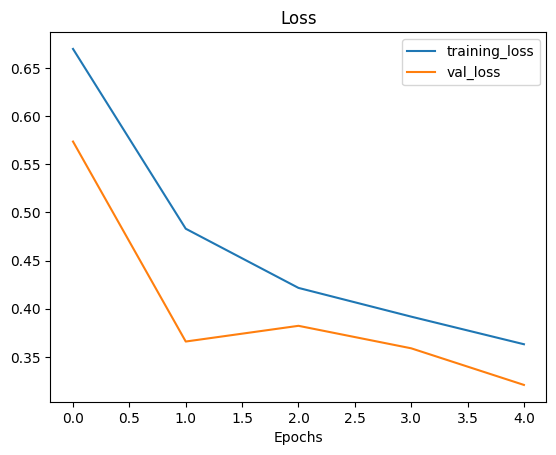

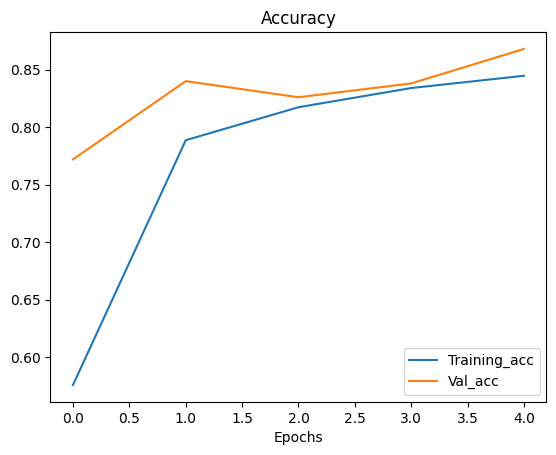

In [ ]:
# Plot the curves
plot_loss_curves(history_5)

**Opening our bag of tricks and finding data Augumentation**

In [ ]:
# Create ImageDataGenerator training instance with data augumentation
train_datagen_augumented=ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)

# Create ImageDataGenerator without data augumentation
train_datagen=ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augumentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augument it from training directory
print("Augumented Training data")
train_data_augumented=train_datagen_augumented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    shuffle=False  #For demo purpose
)

#Create no-augumented train_data batches
print("Non-augumented training data")
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

# Create non-augumented test data batches
print("Non-augumented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary")

Augumented Training data
Found 1500 images belonging to 2 classes.
Non-augumented training data
Found 1500 images belonging to 2 classes.
Non-augumented test data
Found 500 images belonging to 2 classes.


In [ ]:
# Get the sample data batches
images,labels=train_data.next()
augumented_images, augumented_labels=train_data_augumented.next()


Showing image number: 12


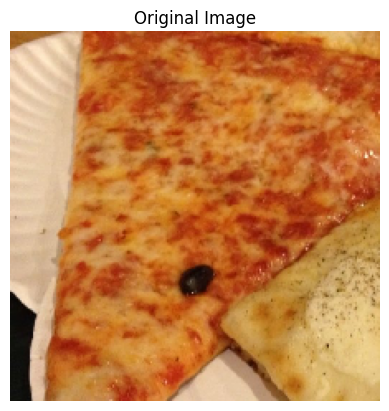

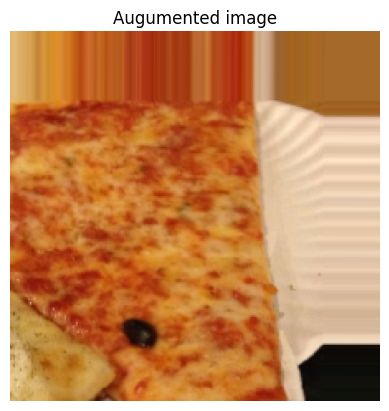

In [ ]:
# Show original image and augumented image
import random
random_number=random.randint(0,32)  # Our batch size
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augumented_images[random_number])
plt.title(f"Augumented image")
plt.axis(False);

In [ ]:
# Fitting model6 on augumented data
model_6=Sequential([
    Conv2D(10,3,1,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6=model_6.fit(train_data_augumented,
            epochs=5,steps_per_epoch=len(train_data_augumented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 446ms/step - loss: 0.9219 - accuracy: 0.5207 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 440ms/step - loss: 0.6901 - accuracy: 0.4987 - val_loss: 0.6701 - val_accuracy: 0.5260
Epoch 3/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6855 - accuracy: 0.5167 - val_loss: 0.6703 - val_accuracy: 0.6700
Epoch 4/5
47/47 [==============================] - 20s 424ms/step - loss: 0.6803 - accuracy: 0.5700 - val_loss: 0.6613 - val_accuracy: 0.5020
Epoch 5/5
47/47 [==============================] - 21s 446ms/step - loss: 0.6659 - accuracy: 0.6147 - val_loss: 0.6529 - val_accuracy: 0.6460


⚠️ Thoda kaam parameters dal in your augumentation data.

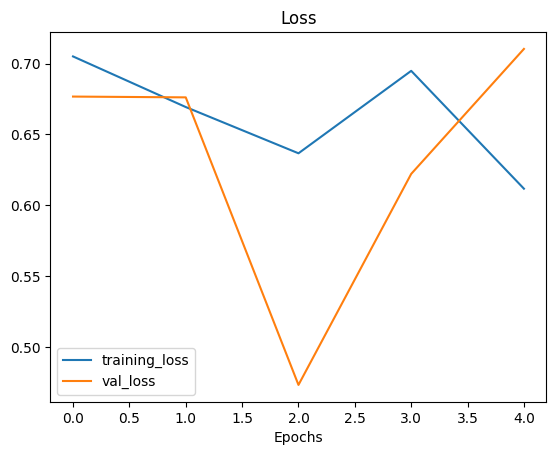

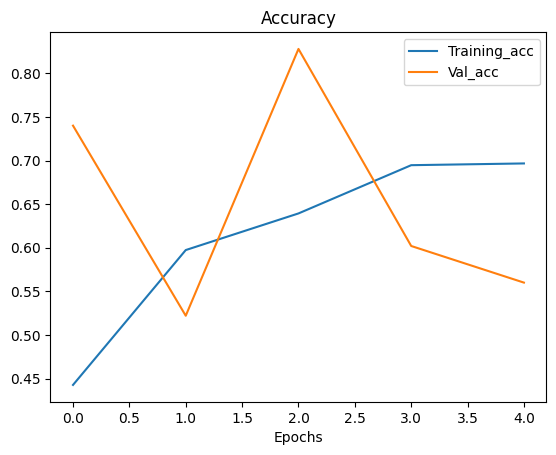

In [ ]:
plot_loss_curves(history_6)

Lets shuffle our augumented training data and train another model and see what happens

In [ ]:
# Import data and augument it and shuffle from training directory

train_data_augumented_shuffled=train_datagen_augumented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode="binary")


Found 1500 images belonging to 2 classes.


In [ ]:
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_7=model_7.fit(train_data_augumented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augumented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 38s 791ms/step - loss: 0.6662 - accuracy: 0.6133 - val_loss: 0.5000 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 38s 810ms/step - loss: 0.5426 - accuracy: 0.7507 - val_loss: 0.4420 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 37s 785ms/step - loss: 0.5497 - accuracy: 0.7327 - val_loss: 0.4113 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 37s 774ms/step - loss: 0.5290 - accuracy: 0.7387 - val_loss: 0.3973 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 38s 797ms/step - loss: 0.4929 - accuracy: 0.7680 - val_loss: 0.3596 - val_accuracy: 0.8360


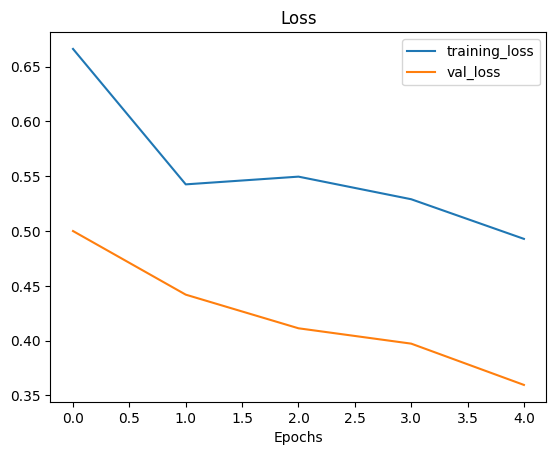

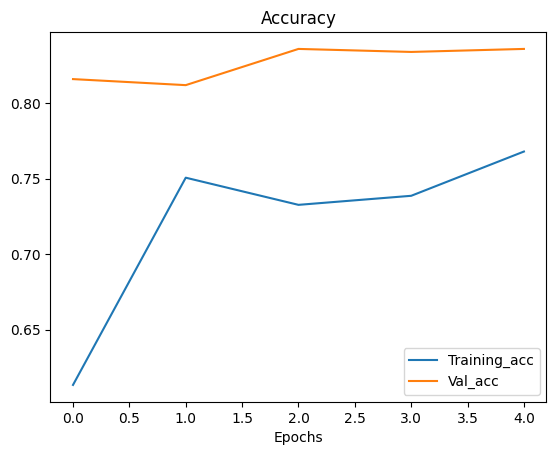

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.AvgPool2D(strides=1),
    Conv2D(10,3,activation="relu"),
    tf.keras.layers.AvgPool2D(strides=1),
    Conv2D(10,3,activation="relu"),
    tf.keras.layers.AvgPool2D(strides=1),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_7=model_7.fit(train_data_augumented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augumented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 476ms/step - loss: 1.8201 - accuracy: 0.5460 - val_loss: 0.6737 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6432 - accuracy: 0.6667 - val_loss: 0.5289 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6532 - accuracy: 0.6067 - val_loss: 0.5534 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6046 - accuracy: 0.6753 - val_loss: 0.4886 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5884 - accuracy: 0.7047 - val_loss: 0.4954 - val_accuracy: 0.7640


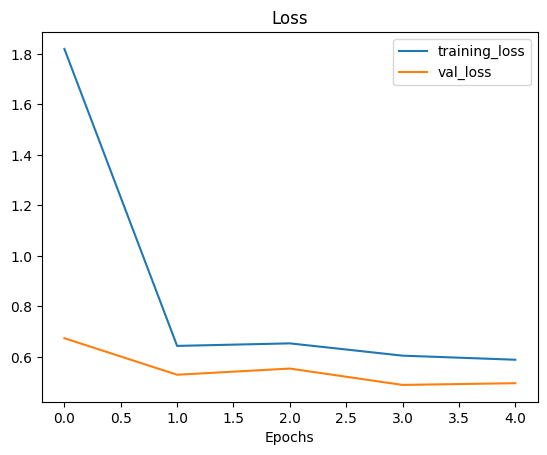

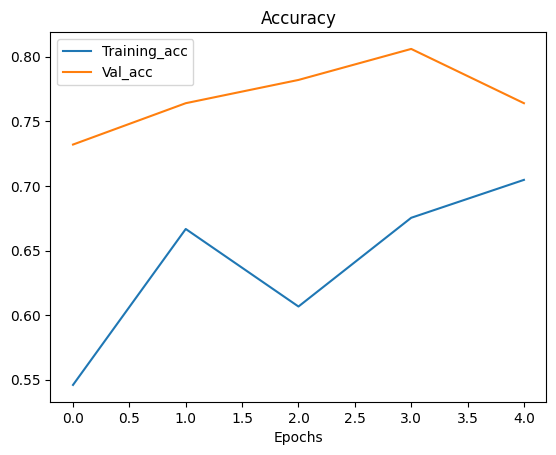

In [ ]:
plot_loss_curves(history_7)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

Giving Custom Input to model

--2024-03-26 01:17:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2024-03-26 01:17:08 (75.9 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



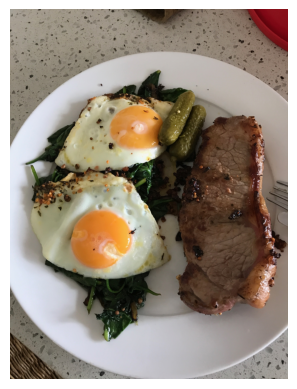

In [ ]:
# View our example image
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
# Create a function to import and image and resize
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename turns it into a tensor and reshapes
  it
  """

  #Read in the image
  img=tf.io.read_file(filename)
  # Decode the read file into a tensor
  img=tf.image.decode_image(img)
  # Resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  #Rescale it into (0-1)
  img=img/255.

  return img


In [ ]:
expanded_steak=tf.expand_dims(steak,axis=0)

In [ ]:
# Load in and preprocess our custom image
steak=load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 17ms/step


array([[0.5927835]], dtype=float32)

In [ ]:
# We can index the predicted class by rounding the prediction
pred=model_7.predict(tf.expand_dims(steak,axis=0))
pred_class=class_names[int(tf.round(pred))]
pred_class

1/1 [==============================] - 0s 29ms/step


'steak'

In [ ]:
def pred_and_plot(model,filenames,class_names=class_names):
  """
  Imports an image located at filename, make a prediction with model
  and plots the image with predicted class as title.
  """

  # Import the target image and preprocess it
  img=load_and_prep_image(filenames)

  # Make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 35ms/step


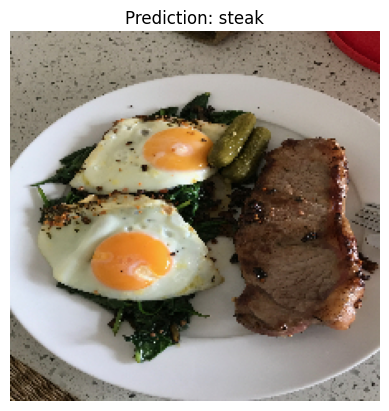

In [ ]:
pred_and_plot(model_7,"03-steak.jpeg")

Lets try on more image

--2024-03-26 01:54:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2024-03-26 01:54:57 (110 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 [==============================] - 0s 19ms/step


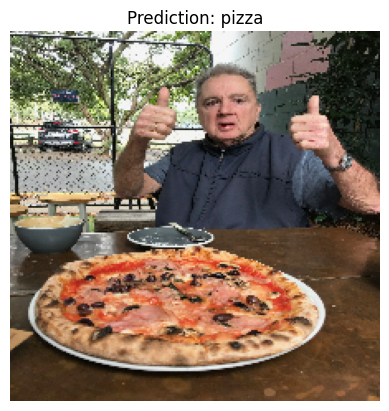

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

**Multi-Class Image Classification**

1. Become One with the data

2. Preprocess the data (get it ready for a model)

3. Create a model (Baseline model)

4. Fit the model

5. Evalaute the model

6. Adjust different hyperparameters and improve the model

7. Repeat until statisfied

8. Check on custom data

In [ ]:
import zipfile
import tensorflow as tf
import pathlib

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2024-03-27 01:39:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  20.4MB/s    in 26s     

2024-03-27 01:40:01 (19.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [ ]:
# Setup the train and test directories

train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
# Lets get class names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)

class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


10_food_classes_all_data/train/hamburger
['1478950.jpg']
Image shape: (512, 512, 3)


array([[[129,   8,   0],
        [136,  16,   2],
        [131,  13,   0],
        ...,
        [255, 251,  61],
        [251, 255,  50],
        [246, 255,  43]],

       [[129,   8,   0],
        [131,  13,   1],
        [128,  10,   0],
        ...,
        [255, 252,  61],
        [250, 252,  45],
        [255, 255,  48]],

       [[142,  24,  14],
        [140,  22,  10],
        [135,  17,   3],
        ...,
        [255, 245,  51],
        [243, 237,  27],
        [253, 250,  33]],

       ...,

       [[ 10,   6,   3],
        [ 11,   7,   4],
        [ 11,   7,   4],
        ...,
        [ 33,   8,   1],
        [ 34,   7,   0],
        [ 31,   4,   0]],

       [[  8,   7,   3],
        [  8,   7,   3],
        [ 10,   6,   3],
        ...,
        [ 34,   7,   0],
        [ 34,   5,   0],
        [ 31,   2,   0]],

       [[  7,   6,   2],
        [  6,   5,   1],
        [  8,   4,   1],
        ...,
        [ 35,   8,   1],
        [ 37,   8,   2],
        [ 35,   6,   0]]], dtype=uint8)
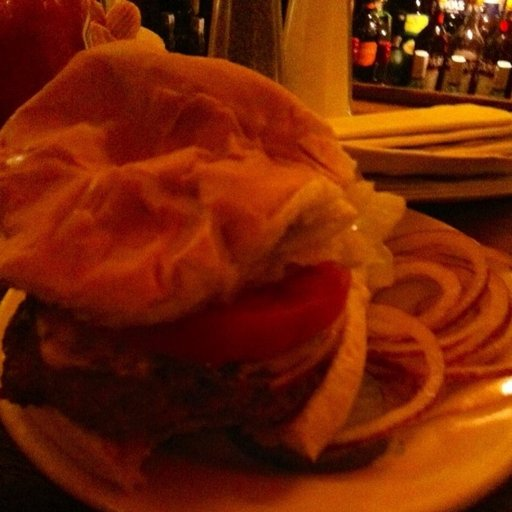

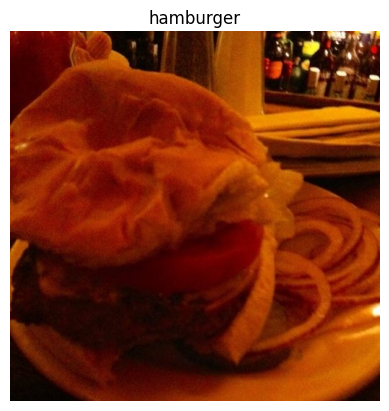

In [ ]:
view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)


# Load the data
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")


test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


CNN model

In [ ]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1=model_1.fit(train_data,
                      epochs=5,steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 34s 124ms/step - loss: 2.1156 - accuracy: 0.2299 - val_loss: 1.9403 - val_accuracy: 0.3148
Epoch 2/5
235/235 [==============================] - 30s 128ms/step - loss: 1.8402 - accuracy: 0.3640 - val_loss: 1.9123 - val_accuracy: 0.3304
Epoch 3/5
235/235 [==============================] - 29s 123ms/step - loss: 1.5348 - accuracy: 0.4787 - val_loss: 2.0498 - val_accuracy: 0.3040
Epoch 4/5
235/235 [==============================] - 33s 139ms/step - loss: 1.0207 - accuracy: 0.6684 - val_loss: 2.4936 - val_accuracy: 0.3004
Epoch 5/5
235/235 [==============================] - 28s 119ms/step - loss: 0.4703 - accuracy: 0.8551 - val_loss: 3.1092 - val_accuracy: 0.3028


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 12s 154ms/step - loss: 3.1092 - accuracy: 0.3028


[3.1091651916503906, 0.3027999997138977]

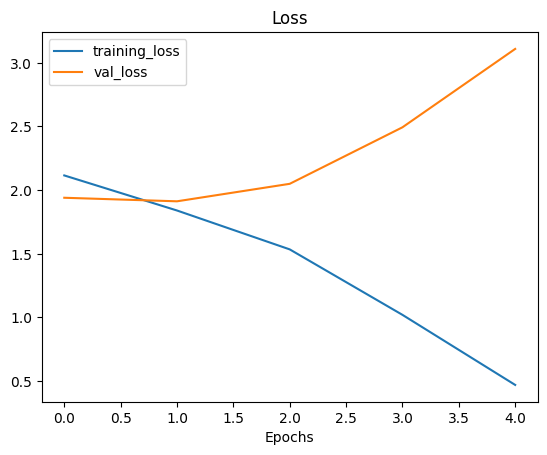

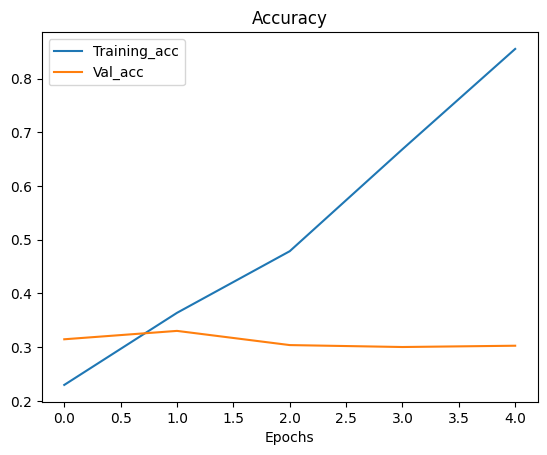

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Lets simply the model_1
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
model_9=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

NameError: name 'Sequential' is not defined

In [ ]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create an augumented data generator
train_data_augumented=ImageDataGenerator(rescale=1./255,
                                         rotation_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True)

train_data_augumented=train_data_augumented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
model_10=tf.keras.models.clone_model(model_1)

#Compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
history_10=model_10.fit(train_data_augumented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augumented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 109s 456ms/step - loss: 2.2410 - accuracy: 0.1640 - val_loss: 2.1175 - val_accuracy: 0.2380
Epoch 2/5
235/235 [==============================] - 107s 456ms/step - loss: 2.0815 - accuracy: 0.2540 - val_loss: 1.9742 - val_accuracy: 0.3044
Epoch 3/5
235/235 [==============================] - 105s 448ms/step - loss: 2.0375 - accuracy: 0.2787 - val_loss: 1.8861 - val_accuracy: 0.3416
Epoch 4/5
235/235 [==============================] - 105s 447ms/step - loss: 2.0089 - accuracy: 0.2844 - val_loss: 1.8713 - val_accuracy: 0.3360
Epoch 5/5
235/235 [==============================] - 107s 455ms/step - loss: 1.9685 - accuracy: 0.3067 - val_loss: 1.8477 - val_accuracy: 0.3564


In [ ]:
plot_loss_curves(history_10)

NameError: name 'plot_loss_curves' is not defined

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
!wget "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg"
!wget "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg"
!wget "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg"

--2024-03-27 01:38:34--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg           [  <=>               ] 258.54K  1.02MB/s    in 0.2s    

2024-03-27 01:38:35 (1.02 MB/s) - ‘03-sushi.jpeg’ saved [264750]

--2024-03-27 01:38:35--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg           [  <=>               ] 157.05K   736KB/s    in 0.2s    

2024-03-27 01:38:36 (736 KB/s) - ‘03-steak.jpeg’ saved [160820]

--2024-03-27 01:38:36--  http

**So, We have not check on custom data as colab got disconnected, So you can try anytime**

Changes for Multi-class classification function as follow

In [ ]:
def pred_and_plot(model,filenames,class_names=class_names):
  """
  Imports an image located at filename, make a prediction with model
  and plots the image with predicted class as title.
  """

  # Import the target image and preprocess it
  img=load_and_prep_image(filenames)

  # Make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))

  if len(pred[0]) > 1:
    pred_class=class_names[tf.argmax(pred[0])]

  else:
    pred_class=class_names[int(tf.round(pred[0]))]

  # Get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

**Model on Multi-Class did not perform well**

**Save & Load our Model**

In [ ]:
# Save model
model_10.save("label")

In [ ]:
# Load in a trained model and evalaute
loaded_model_10=tf.keras.models.load_model("name")